<a href="https://colab.research.google.com/github/ecament/git_test/blob/main/ProyectoFinal_dia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resumen del proyecto final

- En este proyecto, realizaremos un Análisis Exploratorio de Datos (EDA) básico sobre el conjunto de datos de la enfermedad cifosis.
- La cifosis es una curvatura convexa anormalmente excesiva de la columna vertebral.
- El conjunto de datos contiene 81 filas y 4 columnas que representan datos sobre niños que se han sometido a cirugía correctiva de la columna vertebral.
    - ENTRADAS: 1. Edad: en meses, 2. Número: el número de vértebras afectadas, 3. Inicio: el número de la primera vértebra (la más alta) operada.
    - SALIDAS: Cifosis que representa un factor con niveles ausentes presentes que indica si se presentó una cifosis (un tipo de deformación) después de la operación.
- Utilizando el archivo "kyphosis.csv" incluido en el paquete del curso, escribe un script de python para realizar las siguientes tareas:
    1. 1. Importar el archivo "cifosis.csv" utilizando Pandas
    2. 2. Realizar un análisis exploratorio de datos (AED) básico de los datos       
    3. Enumerar la edad media, mínima y máxima (en años) considerada en este estudio utilizando 2 métodos
    4. Representar la matriz de correlaciones
    5. Convierte el tipo de datos de la columna edad de int64 a float64
    6. Definir una función que convierta la edad de meses a años
    7. Aplicar la función a la columna "Edad" y añadir los resultados en una nueva columna titulada "Edad en años"
    8. Cuáles son las características del niño mayor y del menor de este estudio?
    9. Escala la columna "Edad" sin procesar (en meses) utilizando tanto la estandarización como la normalización. Realice una comprobación de sanidad.


###1. importación del datset

In [30]:
import pandas as pd
kph = pd.read_csv('kyphosis.csv')
kph

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


###2. Análisis exploraorio basico

In [31]:
#despliega las primeras 5 filas
kph.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [32]:
#Las últimas 5 líneas del datset
kph.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [33]:
#Dimensión de la tabla
kph.shape

(81, 4)

In [34]:
#Info básica de las variables, tipo variables, cantidad de registros no nulos
kph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [35]:
#Resumen estadísticas de las variables
kph.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [82]:
#No existen Valores nulos
kph.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

###3. Enumerar la edad mínima, máxima, y media utilizando 2 métodos

In [36]:
#Primero se convierten los meses a año para la variable 'Age'
# Se define una función paraq llevar a cabo la conversión
kph_conv = kph.copy()
def age_year(meses):
  return (meses/12)

In [37]:
#Se llama la anterior función mediante el método apply
kph_conv['Age'] = kph_conv['Age'].apply(age_year).round(0)
kph_conv

,Kyphosis,Age,Number,Start
0,absent,6.0,3,5
1,absent,13.0,3,14
2,present,11.0,4,5
3,absent,0.0,5,1
4,absent,0.0,4,15
...,...,...,...,...
76,present,13.0,3,13
77,absent,2.0,7,13
78,absent,10.0,2,13
79,present,4.0,7,6


In [38]:
#Se cálcilan la media, min, max medinate el primer método
mean = kph_conv['Age'].mean()
max = kph_conv['Age'].max()
min = kph_conv['Age'].min()
print(f'Edad media: {mean}')
print(f'Edad máxima: {max}')
print(f'Edad mínima: {min}')


Edad media: 7.0
Edad máxima: 17.0
Edad mínima: 0.0


In [39]:
#Segundo método para obtener las edades
kph_conv.describe().loc[['max', 'mean', 'min'], 'Age']

max     17.0
mean     7.0
min      0.0
Name: Age, dtype: float64

###4. Matriz de correlaciones

In [40]:
kph_conv.corr()

<ipython-input-40-6f49eb910cd4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kph_conv.corr()


,Age,Number,Start
Age,1.000000,-0.004757,0.047316
Number,-0.004757,1.000000,-0.425099
Start,0.047316,-0.425099,1.000000


<ipython-input-41-cf02a8390fe6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kph_conv.corr(), annot=True, cmap='YlGnBu')


<Axes: >

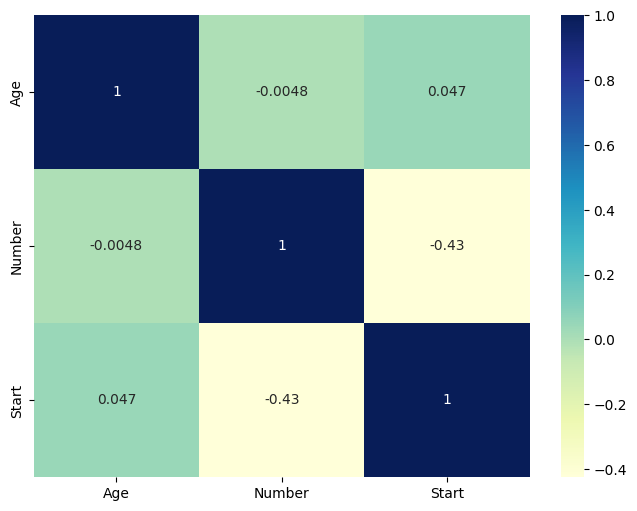

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(kph_conv.corr(), annot=True, cmap='YlGnBu')

###5. Convertir tipo de datos edad desde INT64 a Float|

Ya se realizó en el punto 3. Al convertir la edad a años, el resultado quedo del tipo flotant

In [51]:
kph_conv.dtypes

Kyphosis     object
Age         float64
Number        int64
Start         int64
dtype: object

In [50]:
#En caso que hiciera falta convertirlo a float64 sería como:
kph_conv['Age'] = kph_conv['Age'].astype('float64')

###6.Definir una función que convierta la edad de meses a años
    

In [52]:
def age_year(meses):
  return (meses/12)

###7.Aplicar la función a la columna "Edad" y añadir los resultados en una nueva columna titulada "Edad en años"

In [88]:
#Se llama la anterior función mediante el método apply
kph['Edad en años'] = kph['Age'].apply(age_year).round(2)
kph

,Kyphosis,Age,Number,Start,Edad en años
0,absent,71,3,5,5.92
1,absent,158,3,14,13.17
2,present,128,4,5,10.67
3,absent,2,5,1,0.17
4,absent,1,4,15,0.08
...,...,...,...,...,...
76,present,157,3,13,13.08
77,absent,26,7,13,2.17
78,absent,120,2,13,10.00
79,present,42,7,6,3.50


###8.Cuáles son las características del niño mayor y niño menor?

In [89]:
edadMayor = kph['Edad en años'].max()
edadMenor = kph['Edad en años'].min()

In [90]:
#Se filtrar para obtener los registros del niño mayor y menores
kph[(kph['Edad en años'] == edadMayor) | (kph['Edad en años'] == edadMenor)]
#Todos los niños menores de 1 año y el mayor(17) no poseen Kyphosis

,Kyphosis,Age,Number,Start,Edad en años
4,absent,1,4,15,0.08
5,absent,1,2,16,0.08
13,absent,1,4,12,0.08
15,absent,1,3,16,0.08
36,absent,1,3,9,0.08
73,absent,206,4,10,17.17


###9.Escala la columna "Edad" sin procesar (en meses) utilizando tanto la estandarización como la normalización. Realice una comprobación de sanidad.

In [66]:
#Importación de librerías
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [97]:
#Se realiza la Estandarización de la columna Edad
scalar = StandardScaler()
kph['Age'] = scalar.fit_transform(kph['Age'].values.reshape(-1, 1))
kph['Age']

0    -0.219143
1     1.287494
2     0.767964
3    -1.414063
4    -1.431381
        ...   
76    1.270177
77   -0.998439
78    0.629423
79   -0.721356
80   -0.825262
Name: Age, Length: 81, dtype: float64

In [98]:
#Se confirma que la columna Age queda estandarizada, la edad promedio queda en Cero
#y la desviación estándar es 1
kph.describe().round(2)

,Age,Number,Start
count,81.00,81.00,81.00
mean,0.00,4.05,11.49
std,1.01,1.62,4.88
min,-1.43,2.00,1.00
25%,-1.00,3.00,9.00
50%,0.06,4.00,13.00
75%,0.80,5.00,16.00
max,2.12,10.00,18.00


In [99]:
#Se realiza la Normalización de la columna Edad
scalar = MinMaxScaler()
kph['Age'] = scalar.fit_transform(kph['Age'].values.reshape(-1, 1))
kph['Age']

0     0.341463
1     0.765854
2     0.619512
3     0.004878
4     0.000000
        ...   
76    0.760976
77    0.121951
78    0.580488
79    0.200000
80    0.170732
Name: Age, Length: 81, dtype: float64

In [100]:
#Se confirma que la columna Age queda normalizada, el escalado es de 0 a 1
kph.describe().round(2)

,Age,Number,Start
count,81.00,81.00,81.00
mean,0.40,4.05,11.49
std,0.28,1.62,4.88
min,0.00,2.00,1.00
25%,0.12,3.00,9.00
50%,0.42,4.00,13.00
75%,0.63,5.00,16.00
max,1.00,10.00,18.00
